<a href="https://colab.research.google.com/github/Pranjita1/data-analysis-with-python/blob/master/Automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pylab as plt

In [0]:
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

In [0]:
cars = pd.read_csv(filename)

In [4]:
cars.head(10)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [0]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [0]:
cars = pd.read_csv(filename, names=headers)

In [7]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [0]:
import numpy as np

#Steps -1 - Data Wrangling

#1. checking missing values.

cars.replace('?', np.nan, inplace=True)

In [9]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [0]:
missing_data = cars.isnull() #finding missing values in each column using for loop on a table which stores data frame as boolean over missing value criteria.

In [11]:
for col in missing_data.columns.values.tolist():
    print(col)
    print (missing_data[col].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [0]:
#We take a note of columns which yielded true for isnull
#Normalized losses = 41, 
#num-of-doors = 2, 
#bore = 4, 
#stroke = 4, 
#horsepower = 2, 
#peak-rpm = 2, 
#price = 4
#This step is crucial in deciding replacement strategy.

In [13]:
cars['normalized-losses'].unique() #find unique values in the table. We find that there are many. So, replace nan by mean

array([nan, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [14]:
avg_norm_loss = cars["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [0]:
cars['normalized-losses'].replace(np.nan, avg_norm_loss, inplace = True)

In [16]:
cars['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [0]:
#Since only two values, we decide to replace by door number with max frequency.
door_freq = cars['num-of-doors'].value_counts().idxmax()
cars['num-of-doors'].replace(np.nan, door_freq, inplace = True)

In [18]:
cars['bore'].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.50', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.60', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', nan, '3.39', '3.76', '3.58', '3.46', '3.80',
       '3.78', '3.17', '3.35', '3.59', '2.99', '3.33', '3.70', '3.61',
       '3.94', '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'],
      dtype=object)

In [0]:
#again due to many values, we decide mean replacement

avg_bore = cars['bore'].astype('float').mean(axis=0)
cars['bore'].replace(np.nan, avg_bore, inplace=True)

In [20]:
cars['stroke'].unique()

array(['2.68', '3.47', '3.40', '2.80', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.90', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', nan, '3.16', '3.64', '3.10', '3.35', '3.12', '3.86',
       '3.29', '3.27', '3.52', '2.19', '3.21', '2.90', '2.07', '2.36',
       '2.64', '3.08', '3.50', '3.54', '2.87'], dtype=object)

In [0]:
#replacing by mean:
avg_stroke = cars['stroke'].astype('float').mean(axis=0)
cars['stroke'].replace(np.nan, avg_stroke, inplace=True)

In [22]:
cars['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', nan, '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [23]:
cars['peak-rpm'].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', nan, '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [0]:
#so, use mean for both horsepower and peak-rpm too
avg_hp = cars['horsepower'].astype('float').mean(axis=0)
cars['horsepower'].replace(np.nan, avg_hp, inplace=True)

avg_prpm = cars['peak-rpm'].astype('float').mean(axis=0)
cars['peak-rpm'].replace(np.nan, avg_prpm, inplace=True)

In [0]:
#finally, we decide to drop the missing values in price column, because price is our target value to be predicted so, there is absolutely no point in keeping rows with missing price

In [0]:
cars.dropna(subset=["price"], axis=0, inplace=True)

#and readjust the index
cars.reset_index(drop=True, inplace=True)

In [27]:
cars.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [28]:
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [0]:
#check if all numerical data is in format that they should be in, if not, convert

cars[["bore", "stroke"]] = cars[["bore", "stroke"]].astype("float")
cars[["normalized-losses"]] = cars[["normalized-losses"]].astype("int")
cars[["price"]] = cars[["price"]].astype("float")
cars[["peak-rpm"]] = cars[["peak-rpm"]].astype("float")

In [30]:
cars.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [31]:
#Data standardization

# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
cars['city-L/100km'] = 235/cars["city-mpg"]
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
cars["highway-mpg"] = 235/cars["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
cars.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)


# check your transformed data 
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


In [32]:
#Data Normalization - converting values to be in range 0 to 1

cars['length'] = cars['length']/cars['length'].max()
cars['width'] = cars['width']/cars['width'].max()
cars['height'] = cars['height']/cars['height'].max() 
# show the scaled columns
cars[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


Text(0.5, 1.0, 'horsepower bins')

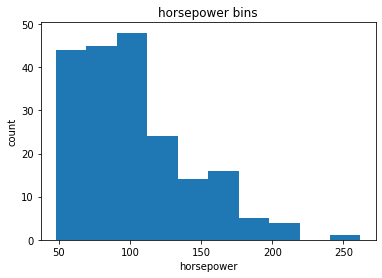

In [33]:
#Binning - grouping based upon data distribution for making grouped analysis

cars["horsepower"]=cars["horsepower"].astype(int, copy=True) #converting it into right datatype

#plotting histogram to get idea how hp is distributed
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(cars["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [34]:
#we use numpy's linspace(start_value, end_value, numbers_generated function.
bins = np.linspace(min(cars["horsepower"]), max(cars["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [0]:
group_names = ['Low', 'Medium', 'High']

In [36]:
#apply the function "cut" the determine what each value of "df['horsepower']" belongs to.

cars['horsepower-binned'] = pd.cut(cars['horsepower'], bins, labels=group_names, include_lowest=True )
cars[['horsepower','horsepower-binned']].head(20)

cars["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

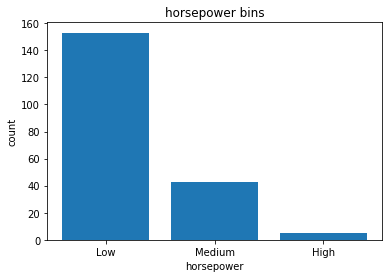

In [37]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, cars["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

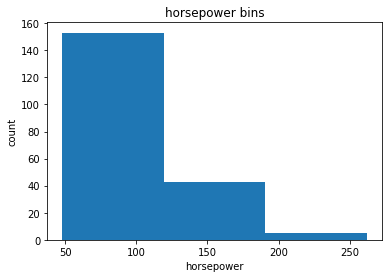

In [38]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(cars["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [39]:
#for regression analysis we convert to indicator variables or dummies

cars.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

In [40]:
dummy_variable_1 = pd.get_dummies(cars["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [0]:
# merge data frame "cars" and "dummy_variable_1" 
df = pd.concat([cars, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "cars"
df.drop("fuel-type", axis = 1, inplace=True)

In [42]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1


In [43]:
asp_variable = pd.get_dummies(cars['aspiration'])
asp_variable

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
196,1,0
197,0,1
198,1,0
199,0,1


In [0]:
df = pd.concat([cars, asp_variable, dummy_variable_1], axis=1)
df.drop('aspiration', axis=1, inplace=True)
df.drop('fuel-type', axis=1, inplace=True)

In [45]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,std,turbo,diesel,gas
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,1,0,0,1
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,1,0,0,1
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,1,0,0,1
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,1,0,0,1
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,1,0,0,1


In [0]:
df.to_csv('Auto-clean.csv')

In [47]:
#exploratory analysis
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [48]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,std,turbo,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,-0.035527,-0.029807,-0.082391,0.066171,0.054615,-0.054615,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,-0.225016,0.181189,0.133999,0.238567,0.006911,-0.006911,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,-0.470606,0.577576,0.584642,0.476153,-0.256889,0.256889,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,-0.665192,0.707108,0.690628,0.657373,-0.230085,0.230085,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,-0.633531,0.736728,0.751265,0.673363,-0.305732,0.305732,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,-0.049800,0.084301,0.135486,0.003811,-0.090336,0.090336,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,-0.749543,0.836921,0.834415,0.785353,-0.321955,0.321955,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,-0.650546,0.783465,0.872335,0.745059,-0.110040,0.110040,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,0.559112,0.543155,0.554610,-0.227816,0.227816,0.054458,-0.054458
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,-0.033956,0.047089,0.082269,0.036133,-0.218233,0.218233,0.241064,-0.241064


In [49]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()  

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression-ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


(0.0, 53321.926139251176)

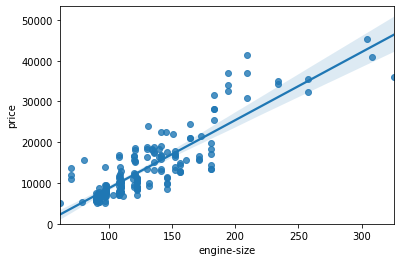

In [50]:
#Continuous numerical variable
#Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64".
# A great way to visualize these variables is by using scatterplots with fitted lines.

# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.pyplot.ylim(0,)

In [51]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


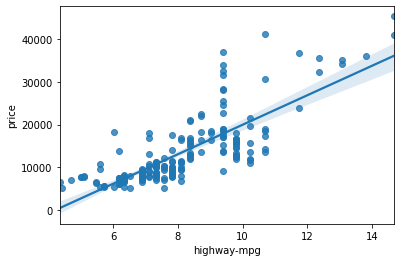

In [52]:
sns.regplot(x="highway-mpg", y="price", data=df)

In [53]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,0.801118
price,0.801118,1.000000


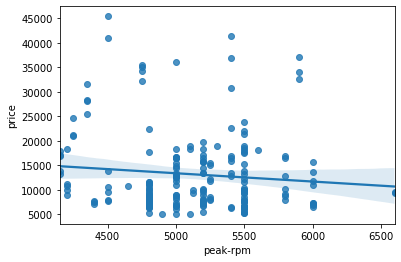

In [54]:
sns.regplot(x="peak-rpm", y="price", data=df)

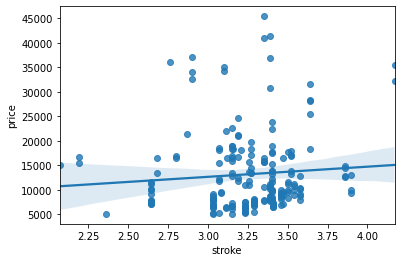

In [55]:
sns.regplot(x="stroke", y="price", data=df)

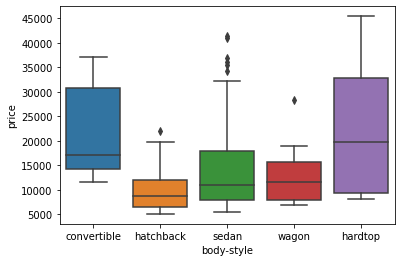

In [56]:
#categorical variables

sns.boxplot(x="body-style", y="price", data=df)


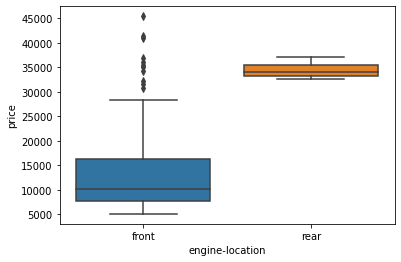

In [57]:
sns.boxplot(x="engine-location", y="price", data=df)

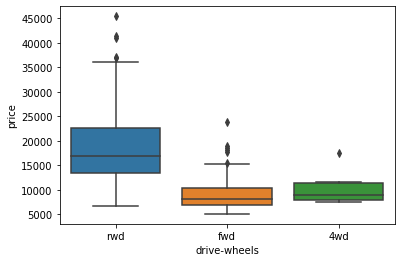

In [58]:
sns.boxplot(x="drive-wheels", y="price", data=df)

In [59]:
#descriptive statistical analysis

df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


In [60]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,std,turbo,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,25.179104,8.044957,13207.129353,9.944145,0.820896,0.179104,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,6.423220,1.840739,7947.066342,2.534599,0.384397,0.384397,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,4.351852,5118.000000,4.795918,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,6.911765,7775.000000,7.833333,1.000000,0.000000,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,7.833333,10295.000000,9.791667,1.000000,0.000000,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,9.400000,16500.000000,12.368421,1.000000,0.000000,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,14.687500,45400.000000,18.076923,1.000000,1.000000,1.000000,1.000000


In [61]:
#Value counts
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [62]:
#Grouping

df_group_one = df[['drive-wheels','body-style','price']]
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [63]:
df_group_one = df[['drive-wheels','body-style','price']]
grouped_test1 = df_group_one.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [64]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  0.0      0.000000  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

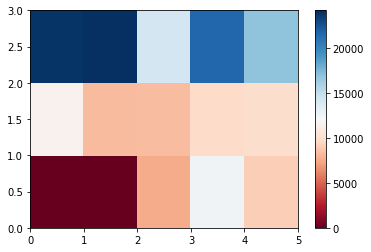

In [65]:
#use the grouped results to plot pivot
plt.pyplot.pcolor(grouped_pivot, cmap='RdBu')
plt.pyplot.colorbar()
plt.pyplot.show()

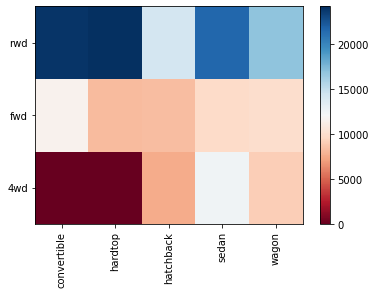

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline 
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [67]:
#Correlation and causation

from scipy import stats

pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


In [68]:
#Although it is statistically significant with p-value less that 0.001, the relationship is not strong with pearson coefficient only approx 0.6

#horsepower vs price
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8096068016571054  with a P-value of P =  6.273536270650504e-48


In [0]:
#here the result is both statistically significant and has a strong linear relationship

In [70]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient of Length and price is", pearson_coef, " with a P-value of P = ", p_value)  

pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient of width and price is", pearson_coef, " with a P-value of P =", p_value ) 


pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient of curb and price is", pearson_coef, " with a P-value of P = ", p_value)  

pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient of engine size and price is", pearson_coef, " with a P-value of P =", p_value) 

pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient of bore and price is", pearson_coef, " with a P-value of P =  ", p_value ) 

pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient of city-mpg and price is", pearson_coef, " with a P-value of P = ", p_value)  

pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient highway-mpg and price is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient of Length and price is 0.6906283804483639  with a P-value of P =  8.016477466159328e-30
The Pearson Correlation Coefficient of width and price is 0.7512653440522673  with a P-value of P = 9.200335510481646e-38
The Pearson Correlation Coefficient of curb and price is 0.8344145257702843  with a P-value of P =  2.189577238894065e-53
The Pearson Correlation Coefficient of engine size and price is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64
The Pearson Correlation Coefficient of bore and price is 0.5431553832626602  with a P-value of P =   8.049189483935489e-17
The Pearson Correlation Coefficient of city-mpg and price is -0.6865710067844678  with a P-value of P =  2.321132065567641e-29
The Pearson Correlation Coefficient highway-mpg and price is 0.8011176263981974  with a P-value of P =  3.046784581041456e-46


In [71]:
#ANOVA - The Analysis of Variance (ANOVA) 
#is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:
'''F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. 
A larger score means there is a larger difference between the means.

P-value: P-value tells how statistically significant is our calculated score value.

If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.'''


'F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. \nA larger score means there is a larger difference between the means.\n\nP-value: P-value tells how statistically significant is our calculated score value.\n\nIf our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.'

In [72]:
grouped_test2=df_group_one[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [73]:
# ANOVA
#all three
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


In [74]:
#fwd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


In [75]:
#4wd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


In [76]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


In [77]:
#Now we have better idea of data and what values to use for building prediction models
'''Continuos variable
Length
Width
Curb-weight
Engine-size
Horsepower
City-mpg
Highway-mpg
Wheel-base
Bore
Categorical variables:

Drive-wheels'''

'Continuos variable\nLength\nWidth\nCurb-weight\nEngine-size\nHorsepower\nCity-mpg\nHighway-mpg\nWheel-base\nBore\nCategorical variables:\n\nDrive-wheels'

In [0]:
#Model development
'''We use Linear regression since we need to forecast price of car based upon it's features.
We use Multiple Linear regression here, as we have several predictors influencing a single response - Price'''

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [79]:
drive_wheels = pd.get_dummies(df["drive-wheels"])
df = pd.concat([df, drive_wheels], axis = 1)
df

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,std,turbo,diesel,gas,4wd,fwd,rwd
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,1,0,0,1,0,0,1
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,1,0,0,1,0,0,1
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,1,0,0,1,0,0,1
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,1,0,0,1,0,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400.0,23,8.392857,16845.0,10.217391,Low,1,0,0,1,0,0,1
197,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.955556,0.928094,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300.0,19,9.400000,19045.0,12.368421,Medium,0,1,0,1,0,0,1
198,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500.0,18,10.217391,21485.0,13.055556,Medium,1,0,0,1,0,0,1
199,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800.0,26,8.703704,22470.0,9.038462,Low,0,1,1,0,0,0,1


In [80]:
df

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,std,turbo,diesel,gas,4wd,fwd,rwd
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,1,0,0,1,0,0,1
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,1,0,0,1,0,0,1
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,1,0,0,1,0,0,1
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,1,0,0,1,0,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400.0,23,8.392857,16845.0,10.217391,Low,1,0,0,1,0,0,1
197,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.955556,0.928094,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300.0,19,9.400000,19045.0,12.368421,Medium,0,1,0,1,0,0,1
198,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500.0,18,10.217391,21485.0,13.055556,Medium,1,0,0,1,0,0,1
199,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,0.928094,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800.0,26,8.703704,22470.0,9.038462,Low,0,1,1,0,0,0,1


In [0]:
Z = df[['length', 'width', 'curb-weight','engine-size','horsepower','city-mpg','highway-mpg','wheel-base','bore','fwd','rwd']]

In [0]:
y = df['price']

In [83]:
lm.fit(Z, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
lm.intercept_

-56613.662843327504

In [85]:
lm.coef_

array([ 3.22534962e+03,  5.61854321e+04, -3.76563242e-01,  8.25300816e+01,
        4.89788149e+01,  1.45297971e+02,  7.23081880e+02, -1.51715828e+01,
       -1.99709417e+03, -1.32723521e+03,  1.56784482e+03])

(0.0, 47759.15828588637)

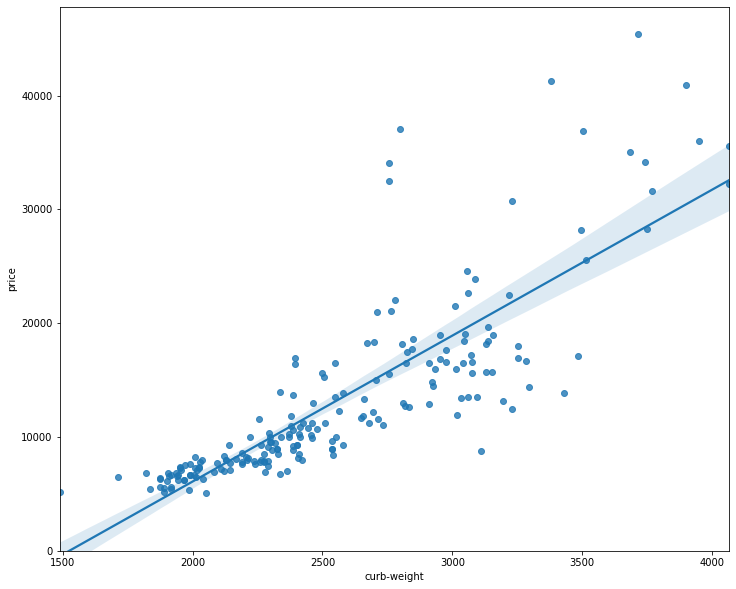

In [86]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="curb-weight", y="price", data=df)
plt.ylim(0,)

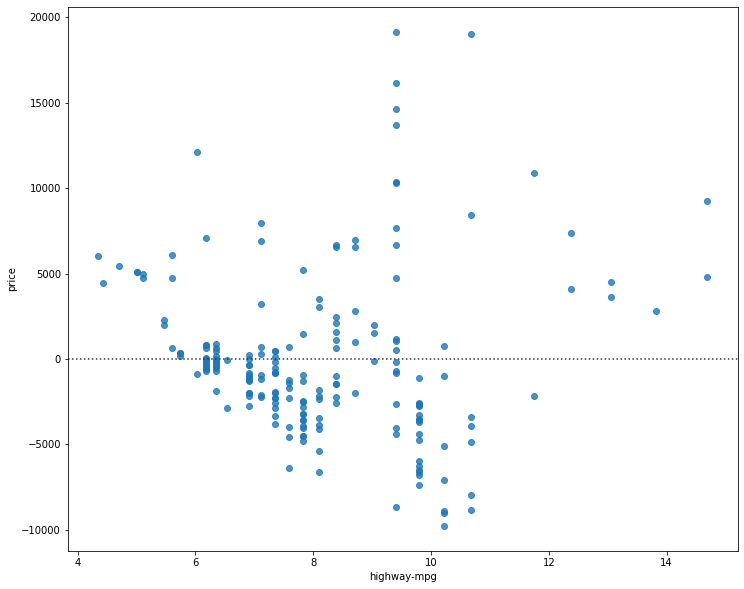

In [87]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

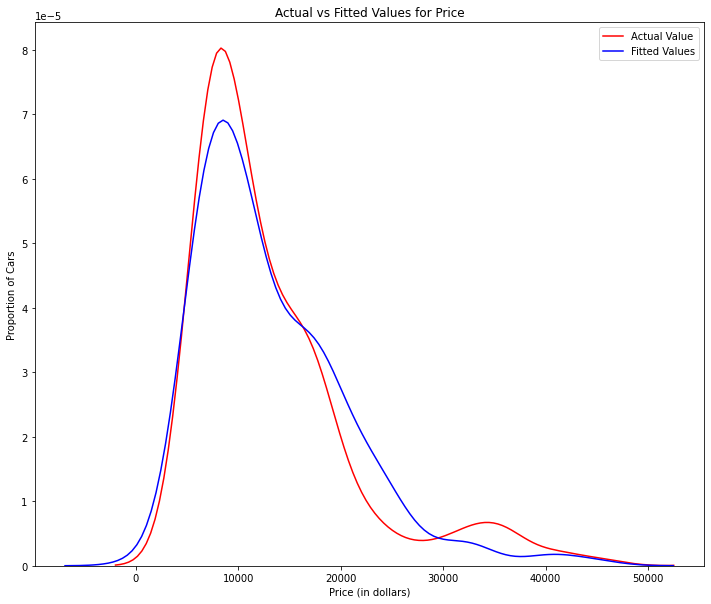

In [88]:
Yhat = lm.predict(Z)

plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [0]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()
    #Setting a function to get polynomial fit 
    #We are thinking of polynomial regression to see if we can achieve better results compared to multiple linear regression

In [91]:
x = df['highway-mpg']
y = df['price']
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

       3         2
-23.4 x + 923.6 x - 7083 x + 2.152e+04


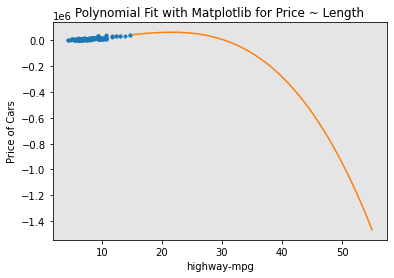

In [92]:
PlotPolly(p, x, y, 'highway-mpg')

In [93]:
np.polyfit(x, y, 3)

array([  -23.40461026,   923.57034965, -7083.14334079, 21515.16034362])

In [0]:
from sklearn.preprocessing import PolynomialFeatures

In [95]:
#I create a polynomial function of degree 2
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [0]:
Z_pr=pr.fit_transform(Z)

In [97]:
Z.shape

(201, 11)

In [98]:
Z_pr.shape

(201, 78)

In [0]:
#Pipeline - Data Pipelines simplify the steps of processing the data

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [101]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(Z,y)
ypipe=pipe.predict(Z)
ypipe[0:4]

array([14524.75 , 14524.75 , 15630.75 , 12177.875])

In [103]:
#R-squared and MSE

lm.score(Z,y)

0.8342871320059502

In [106]:
from sklearn.metrics import r2_score

r_squared = r2_score(y, p(x))
print('The R-square value of polynomial regresson is: ', r_squared)

The R-square value of polynomial regresson is:  0.6753581660812171


In [108]:
#MSE
from sklearn.metrics import mean_squared_error

mean_squared_error(df['price'], Yhat)

10413670.907274226

In [109]:
mean_squared_error(df['price'], p(x))

20401030.180019397

In [0]:
#Prediction over new input

#new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [116]:
'''Decision making:

Here we take up - Multiple linear regression model because:
1. It's R-squared is higher
2. It's MSE is lower
than Polynomial regression, both of which criteria supports a choice on it's behalf.'''

"Decision making:\n\nHere we take up - Multiple linear regression model because:\n1. It's R-squared is higher\n2. It's MSE is lower\nthan Polynomial regression, both of which criteria supports a choice on it's behalf."